<a href="https://colab.research.google.com/github/Lucas-Abrahao/projetos/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O Conjunto de Dados

De acordo com a OMS (Organização Mundial de Saúde) a 2ª maior causa de mortes no mundo é o derrame ou AVC (Acidente Vascular Cerebral), responsável por aproximadamente 11% do total das mortes.

Esse Conjunto de Dados é utilizado para prever se um paciente poderá ter um AVC com base nos Parâmetros de entrada, como sexo, idade, algumas doenças e grau de tabagismo.



According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This Dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

##Kaggle Database | Base de Dados do Kaggle

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

#Importando e Extraindo o Dataset | Importing Libraries and Loading dataset

In [1]:
!unzip archive.zip

Archive:  archive.zip
replace healthcare-dataset-stroke-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


In [3]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#Checando valores Nulos | Checking for Null Values

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

bmi: body mass index 

The dataset contains some missing values in bmi column.

Let's try to remove or fill that first before moving on.

Upon search I found that bmi mostly depends on age and gender. 

So trying to impute missing values based on that.

We can try grouping the age into toddler, teen, adult and senior and then impute the bmi values based on the median.

---

O dataset tem alguns valores faltantes na coluna bmi.

Vamos tentar remover ou preencher as informações antes de continuar.

Em uma breve pesquisa descobri que o bmi depende de idade e genêro.

Então vamos tentar preencher os valores faltantes com base nisso.

Podemos tentar agrupar a idade em criança, adolescente, adulto e sênior e então imputar os valores de BMI com base na mediana.

In [6]:
age_group=[]

for i in df['age']:

    if i < 2.0:
        age_group.append('Toddler')

    elif i > 2.0 and i <= 19.0:
        age_group.append('Teen')

    elif i > 19.0 and i < 60.0:
        age_group.append('Adult')

    else:
        age_group.append('Senior')

df['age_group'] = age_group
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


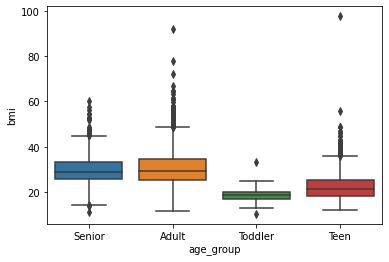

In [7]:
ax = sns.boxplot(x= df['age_group'],y=df['bmi'])
plt.show()

In [8]:
ax = px.box(df, x = "age_group", y = "bmi", color = "gender")
ax.show()


In [9]:
def impute_bmi(cols):
    bmi = cols[0]
    age_group = cols[1]
    gender = cols[2]

    if pd.isnull(bmi):

        if age_group == 'Senior':

            if gender == 'Male':
                return 29.0
            else:
                return 28.9

        elif age_group == 'Adult':

            if gender == 'Male':
                return 30.2
            else:
                return 28.8

        elif age_group == 'Teen':

            if gender == 'Male':
                return 20.6
            else:
                return 21.8

        else:
            if gender == 'Male':
                return 18.9
            else:
                return 18.05

    else:
        return bmi

df['bmi'] = df[['bmi','age_group','gender']].apply(impute_bmi,axis=1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

In [11]:
df.drop(index = df[df['gender']=='Other'].index[0] ,axis=0,inplace=True)

#EDA

Storing categorical and continuous columns into separate lists 

---

Guardando dados categóricos e continuos em listas separadas

In [12]:
con_cols=['age','avg_glucose_level','bmi']
cat_cols=[]

for i in df.columns:

    if i != 'id' and i != 'stroke' and i not in con_cols:
        cat_cols.append(i)

cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'age_group']

Checking Values in each categorical column

---

Checando os Valores em cada coluna categórica

In [13]:
cat_cols.append('age_group')

for i in cat_cols:
    print(f'============Values in {i}============\n{df[i].value_counts()}\n------------------------')

============Values in gender============
Female    2994
Male      2115
Name: gender, dtype: int64
------------------------
============Values in hypertension============
0    4611
1     498
Name: hypertension, dtype: int64
------------------------
============Values in heart_disease============
0    4833
1     276
Name: heart_disease, dtype: int64
------------------------
============Values in ever_married============
Yes    3353
No     1756
Name: ever_married, dtype: int64
------------------------
============Values in work_type============
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
------------------------
============Values in Residence_type============
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64
------------------------
============Values in smoking_status============
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name:

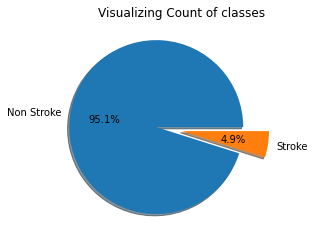

In [14]:
plt.title("Visualizing Count of classes")
plt.pie(np.array(df['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0.3,0],autopct='%1.1f%%',shadow=True)
plt.show()

Evaluating chances of getting a stroke

---

Avaliando as chances de se ter um derrame

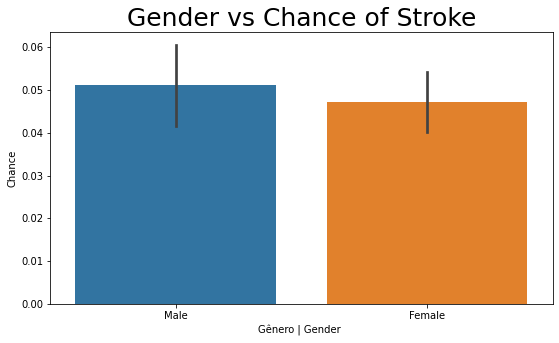

In [15]:
plt.figure(figsize = (9,5))
ax = sns.barplot(x = df['gender'],y = df['stroke'],data = df,)
ax.set_title('Gender vs Chance of Stroke',fontdict = { 'fontsize': 25})
  
plt.ylabel('Chance')
plt.xlabel('Gênero | Gender ')
plt.show()

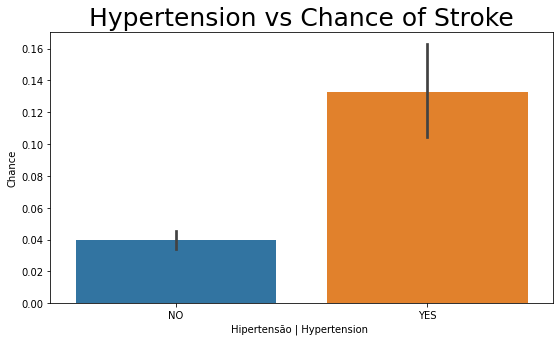

In [16]:
plt.figure(figsize = (9,5))
ax = sns.barplot(x = df['hypertension'],y = df['stroke'],data = df)
ax.set_title('Hypertension vs Chance of Stroke',fontdict = { 'fontsize': 25})
ax.set_xticklabels(['NO','YES'])
plt.ylabel('Chance')
plt.xlabel('Hipertensão | Hypertension ')
plt.show()

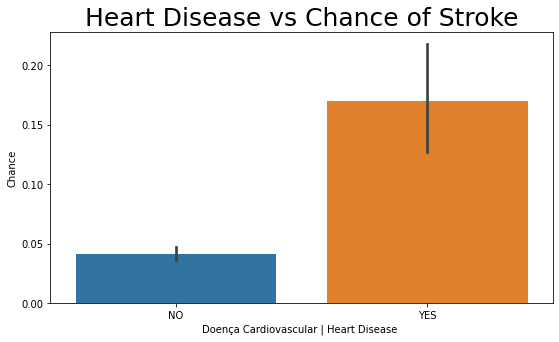

In [17]:
plt.figure(figsize = (9,5))
ax = sns.barplot(x = df['heart_disease'],y = df['stroke'],data = df)
ax.set_title('Heart Disease vs Chance of Stroke',fontdict = { 'fontsize': 25})
ax.set_xticklabels(['NO','YES'])
plt.ylabel('Chance')
plt.xlabel('Doença Cardiovascular | Heart Disease ')
plt.show()

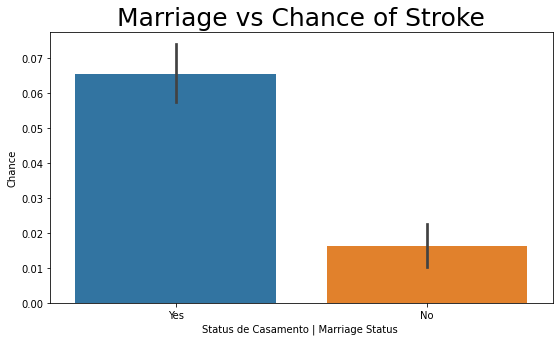

In [18]:
plt.figure(figsize = (9,5))
ax = sns.barplot(x = df['ever_married'],y = df['stroke'],data = df)
ax.set_title('Marriage vs Chance of Stroke',fontdict = { 'fontsize': 25})

plt.ylabel('Chance')
plt.xlabel('Status de Casamento | Marriage Status ')
plt.show()

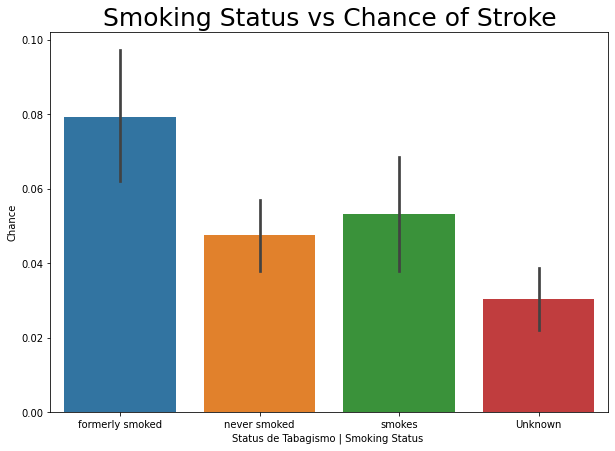

In [19]:
plt.figure(figsize = (10,7))
ax = sns.barplot(x = df['smoking_status'],y = df['stroke'],data = df)
ax.set_title('Smoking Status vs Chance of Stroke',fontdict = { 'fontsize': 25})

plt.ylabel('Chance')
plt.xlabel('Status de Tabagismo | Smoking Status ')
plt.show()

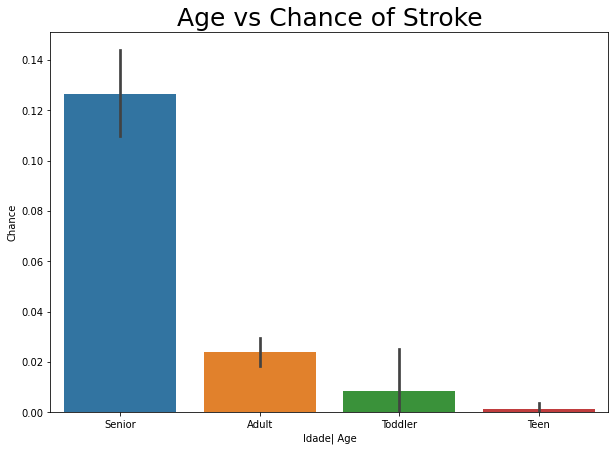

In [20]:
plt.figure(figsize = (10,7))
ax = sns.barplot(x = df['age_group'],y = df['stroke'],data = df)
ax.set_title('Age vs Chance of Stroke',fontdict = { 'fontsize': 25})

plt.ylabel('Chance')
plt.xlabel('Idade| Age')
plt.show()

#Data Processing | Processamento dos Dados

In [21]:
cat_cols.pop()
df_enc=pd.get_dummies(df[cat_cols],drop_first=True)
df_enc.head()

,hypertension,heart_disease,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,0,1,1,1,0,1,0,0,1,1,0,0,1,0,0
1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0
3,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [22]:
df[df_enc.columns]=df_enc
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,1,0,0,1,1,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,...,0,1,0,0,0,1,0,1,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,1,0,0,0,0,1,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,1,0,0,1,0,0,1,0,0,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,0,0,1,0,1,0,0


In [23]:
df.drop(cat_cols,axis=1,inplace=True)
df.head()

,id,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,9046,67.0,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0,1,0,0
1,51676,61.0,202.21,28.9,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0,1,0,0
3,60182,49.0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,1665,79.0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0


In [24]:
df_final = df.drop(['id'],axis=1)
df_final.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,67.0,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0,1,0,0
1,61.0,202.21,28.9,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0,1,0,0
3,49.0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,79.0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0


In [25]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X = df_final.drop(['stroke'], axis = 1)
y = df_final['stroke']
X_over, y_over = oversample.fit_resample(X, y)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, stratify = y_over, random_state = 42)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[con_cols] = scaler.fit_transform(X_train[con_cols])
X_test[con_cols] = scaler.transform(X_test[con_cols])

X_train.head()

,age,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
9192,-0.040108,-0.567231,0.234420,1,1,0,0,0,0,0,0,0,1,0,0,0
3629,0.139763,1.546893,1.462273,1,1,0,0,0,0,0,0,1,0,0,0,0
9526,1.129056,-0.155314,-0.083377,0,1,0,0,0,0,1,0,0,0,1,0,0
539,-0.534754,-0.694003,3.181267,0,1,0,1,0,0,0,0,0,0,0,0,0
5479,1.129056,-0.915582,-0.473401,0,1,0,0,1,0,1,0,0,0,1,0,0


#Model

##KNearest Neighbors - 97% ACC

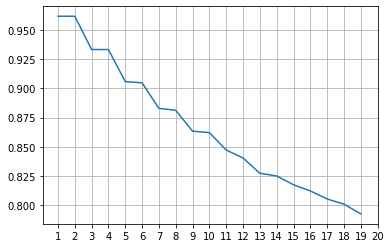

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

knn_scores=[]

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 5)
    knn_scores.append(scores.mean())

x_ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)], knn_scores)
plt.xticks(ticks=x_ticks, labels = x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1458
           1       0.94      1.00      0.97      1458

    accuracy                           0.97      2916
   macro avg       0.97      0.97      0.97      2916
weighted avg       0.97      0.97      0.97      2916



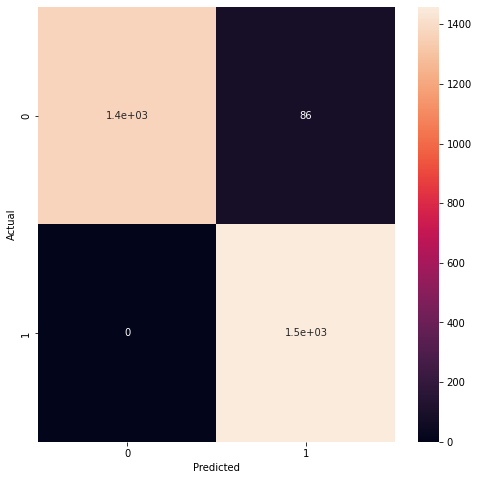

In [29]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix

confusion_knn = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

from sklearn.metrics import classification_report

print(classification_report(y_test,knn.predict(X_test)))



## Support Vector Machine - 99% ACC

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1458
           1       1.00      1.00      1.00      1458

    accuracy                           1.00      2916
   macro avg       1.00      1.00      1.00      2916
weighted avg       1.00      1.00      1.00      2916



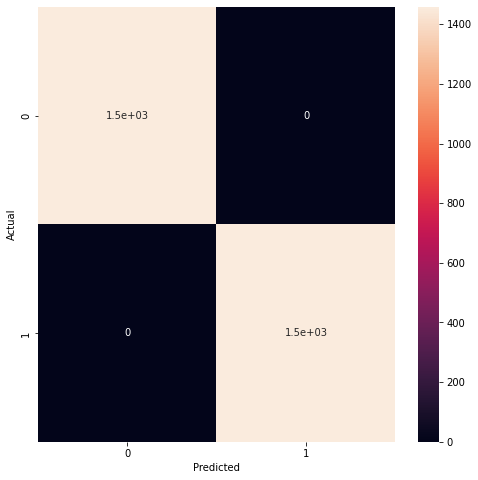

In [30]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
rcv = RandomizedSearchCV(SVC(), param_grid, cv = 5)
rcv.fit(X_train, y_train)
y_pred_svc = rcv.predict(X_test)
confusion_svc = confusion_matrix(y_test, rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test,y_pred_svc))

##Logistic Regression - 78% ACC

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1458
           1       0.75      0.84      0.79      1458

    accuracy                           0.78      2916
   macro avg       0.79      0.78      0.78      2916
weighted avg       0.79      0.78      0.78      2916



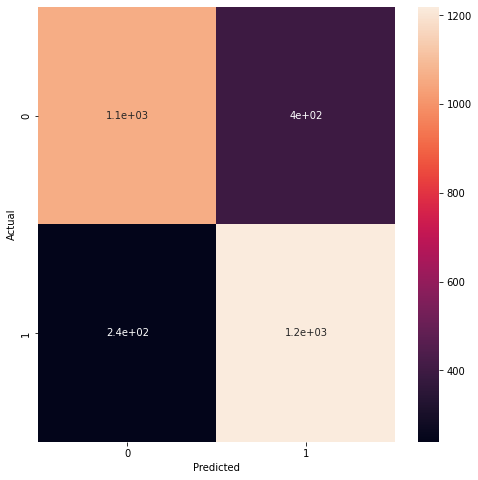

In [31]:
import warnings 
warnings.filterwarnings('ignore')

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'max_iter':[50, 75, 100, 200, 300, 400, 500, 700]}
log = RandomizedSearchCV(LogisticRegression(solver = 'lbfgs'), param_grid, cv = 5)
log.fit(X_train,y_train)
y_pred_log = log.predict(X_test)
confusion_log = confusion_matrix(y_test, log.predict(X_test))
plt.figure(figsize = (8,8))
sns.heatmap(confusion_log, annot = True)

plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test,y_pred_log))